# Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)   
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.  
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).  


1. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором метод ближайших соседей работает хуже, чем логистическая регрессия. 

2. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

3. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.

4. Сгенерировать датасет для задачи регрессии (MSE),
на котором решающее дерево работает хуже, чем линейная регрессия. 


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import random

logistic_pipe = Pipeline([
    ('clsf', LogisticRegression())
])
logistic_params = {
    "clsf__C": [ x / 10.0 for x in range(1,20) ],
    "clsf__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
neighbors_pipe = Pipeline([
    ('clsf', KNeighborsRegressor())
])
neighbors_params = {
    "clsf__n_neighbors": [i for i in range(1,6)],
    "clsf__metric": ['cosine','minkowski'],
    "clsf__p": [i for i in range(1,4)]
}

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

def show_plot(data, output):
    x = [p[0] for p in data]
    y = [p[1] for p in data]
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Датасет")
    plt.scatter(x, y, c=output)
    plt.show()

def get_random_in_radius(x, y, r):
    return (x + (random.random() - 0.5) * r, y + (random.random() - 0.5) * r)

Датасет 1

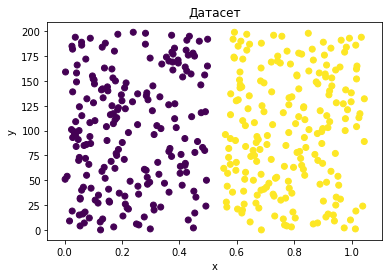

Logistic regression result: 0.9975
Neighbors regression result: 0.6


In [76]:
data = []
output = []

for i in range(200):
    data.append((0 + random.random() / 2, i))
    output.append(0)
    
    data.append((0.55 + random.random() / 2, i))
    output.append(1)

show_plot(data, output)

log_search = GridSearchCV(logistic_pipe, logistic_params, cv=5)
nei_search = GridSearchCV(neighbors_pipe, neighbors_params, cv=5)

log_result = log_search.fit(data, output)
print("Logistic regression result:", log_result.best_score_)

nei_result = nei_search.fit(data, output)
print("Neighbors regression result:", nei_result.best_score_)

Датасет 2

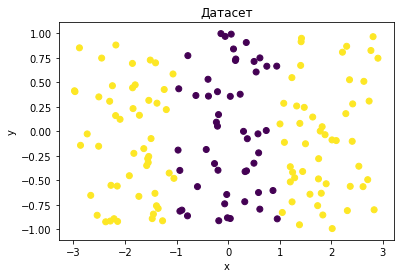

Logistic regression result: 0.6666666666666666
Neighbors regression result: 0.8787999999999999


In [77]:
data = []
output = []

for i in range(50):
    data.append(get_random_in_radius(0,0,2))
    output.append(0)
    
    data.append(get_random_in_radius(2,0,2))
    output.append(1)
    
    data.append(get_random_in_radius(-2,0,2))
    output.append(1)

show_plot(data, output)

log_search = GridSearchCV(logistic_pipe, logistic_params, cv=5)
nei_search = GridSearchCV(neighbors_pipe, neighbors_params, cv=5)

log_result = log_search.fit(data, output)
print("Logistic regression result:", log_result.best_score_)

nei_result = nei_search.fit(data, output)
print("Neighbors regression result:", nei_result.best_score_)

Датасет 3

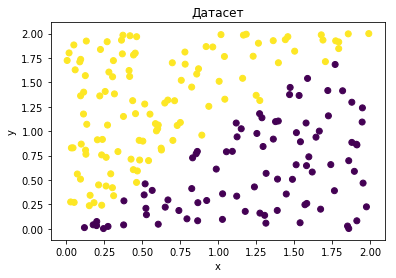

Cosine Neighbors regression result: 1.0
Euclid Neighbors regression result: 0.9126306184106696


In [78]:
cosine_params = {
    "clsf__n_neighbors": [i for i in range(1,6)],
    "clsf__metric": ['cosine'],
    "clsf__p": [i for i in range(1,4)]
}
euclid_params = {
    "clsf__n_neighbors": [i for i in range(1,6)],
    "clsf__metric": ['euclidean']
}

data = []
output = []

for i in range(200):
    point = get_random_in_radius(1, 1, 2)
    data.append(point)
    output.append(0 if point[0] > point[1] else 1)

show_plot(data, output)
    
nei_search = GridSearchCV(neighbors_pipe, cosine_params, cv=5)
nei_result = nei_search.fit(data, output)
print("Cosine Neighbors regression result:", nei_result.best_score_)

nei_search = GridSearchCV(neighbors_pipe, euclid_params, cv=5)
nei_result = nei_search.fit(data, output)
print("Euclid Neighbors regression result:", nei_result.best_score_)

Датасет 4

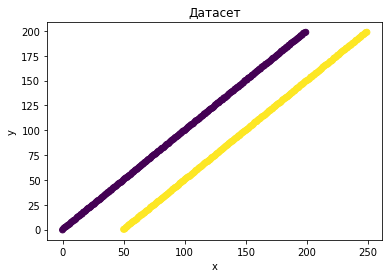

Tree Decision regression result: 0.36489999999999995
Linear regression result: 0.9998624692619918


In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
tree_pipe = Pipeline([
    ('clsf', DecisionTreeRegressor())
])
tree_params = {
    "clsf__criterion": ['mse', 'mae', 'friedman_mse'],
    "clsf__splitter": ['best', 'random'],
    "clsf__min_samples_split": [i for i in range(2,5)],
    "clsf__min_samples_leaf": [i for i in range(1,5)],
}
linear_pipe = Pipeline([
    ('clsf', LinearRegression())
])
linear_params = {}

data = []
output = []

for i in range(200):
    data.append((i, i-0.5+random.random()))
    output.append(0)
    data.append((i+50, i-0.5+random.random()))
    output.append(1)

show_plot(data, output)
    
tree_search = GridSearchCV(tree_pipe, tree_params, cv=5)
tree_result = tree_search.fit(data, output)
print("Tree Decision regression result:", tree_result.best_score_)

lin_search = GridSearchCV(linear_pipe, linear_params, cv=5)
lin_result = lin_search.fit(data, output)
print("Linear regression result:", lin_result.best_score_)